Introduction

In this walkthrough, we’ll review the steps from the linear regression lab, explaining each part of the process and providing the correct solution. This guide will help you verify your work and understand the reasoning behind each step of implementing a linear regression model. By following this guide, you will better understand how to build and evaluate a model that predicts house prices based on square footage, a fundamental task in machine learning regression problems.

By the end of this walkthrough, you will be able to:

    Understand the dataset.

    Train the model.

    Evaluate the model.

    Visualize the results.

1. Loading and preparing the data

In the lab, we worked with a dataset that included house prices based on square footage. The first step was to load the dataset and create a Pandas DataFrame:

In [8]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [9]:
data = {
    'SquareFootage': [1500, 1800, 2400, 3000, 3500, 4000, 4500],
    'Price': [200000, 250000, 300000, 350000, 400000, 500000, 600000]
}

df = pd.DataFrame(data)
print(df.head())

   SquareFootage   Price
0           1500  200000
1           1800  250000
2           2400  300000
3           3000  350000
4           3500  400000


Here, we created a simple dataset with two columns: SquareFootage (our input feature) and Price (our target variable). This dataset is a good fit for a linear regression problem since the relationship between square footage and price is likely linear.

2. Splitting the data

Next, we split the data into training and testing sets. This is crucial for building a model that generalizes well to unseen data:

In [10]:
X = df[['SquareFootage']]  # Features
y = df['Price']            # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    Training set: 80% of the data, used to train the model

    Test set: 20% of the data, used to evaluate the model's performance

By splitting the data, we ensure that the model isn’t overfitting to the training set and can predict values for new, unseen data.

In [12]:
# Initialize the scaler
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler_X = StandardScaler()
scaler_y = StandardScaler() # You could also scale y, though less common for standard LR

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

3. Training the linear regression model

We then initialized and trained the linear regression model using the training data:

In [13]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)

print(f"Intercept: {model.intercept_}")
print(f"Coefficient: {model.coef_[0]}")

Intercept: 430000.0
Coefficient: 105444.1264885369


    Intercept: This is the value of the target variable when the input feature is zero. In this case, it represents the base price of a house without considering its square footage.

    Coefficient: This is the slope of the linear regression line, representing the rate at which the house price increases for each additional square foot.

For example, if the coefficient is 100, it means that for every additional square foot, the house price increases by $100.

4. Making predictions

Once the model was trained, we used it to make predictions on the test set

In [14]:
y_pred = model.predict(X_test_scaled)

print("Predicted Prices:", y_pred)
print("Actual Prices:", y_test.values)

Predicted Prices: [146307.23781388 189290.98966027]
Actual Prices: [200000 250000]


The predicted prices are the model’s estimates based on the square footage from the test set. Comparing these predictions to the actual house prices gives us insight into how well the model performed.

5. Evaluating the model

To evaluate the model’s performance, we used mean squared error (MSE) and R-squared (R²) metrics:

In [16]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3284248323.802326
R-squared: -4.254797318083722


MSE: This metric measures the average squared difference between the predicted and actual values. A lower MSE indicates a more accurate model.

R²: This metric tells us how well the model explains the variance in the target variable. An R² value close to 1 means the model explains most of the variance, while a value closer to 0 indicates poor performance

6. Visualizing the results

Finally, we plotted the actual house prices and the regression line to visualize how well the model fits the data:

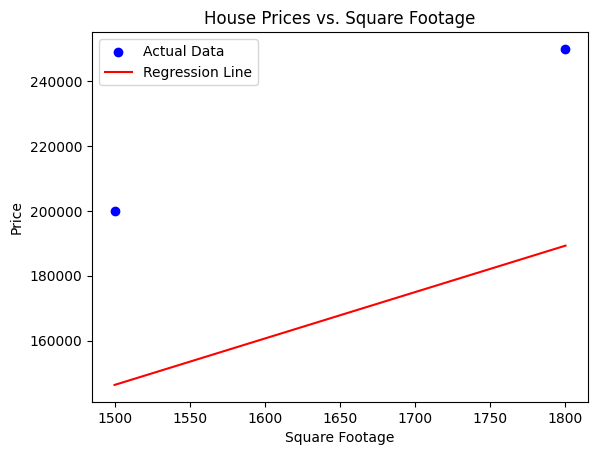

In [17]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.title('House Prices vs. Square Footage')
plt.legend()
plt.show()

The plot shows:

    Blue dots representing the actual house prices.

    A red line representing the regression line learned by the model.

A good fit will show the red line passing closely through the blue points, indicating that the model’s predictions align with the actual data.

In summary: The very high MSE and significantly negative R-squared value suggest that the linear regression model performed poorly on the test data. This could be due to several factors, including the very small size of your test set (only 2 data points), which makes the evaluation metrics highly sensitive to the specific points chosen. While linear regression might be a reasonable approach for this type of problem generally, the evaluation on this minimal test set indicates a lack of generalization or a poor fit for those specific points. With more data, especially in the test set, the evaluation metrics would provide a more reliable assessment of the model's performance.

Lets train the model with whole data as our data is limited

R-squared: 0.01316409765043458
Mean Squared Error (MSE): 10641595301.757067
Intercept: 202597.59358288767
Coefficient for SquareFootage: -30.4946524064171


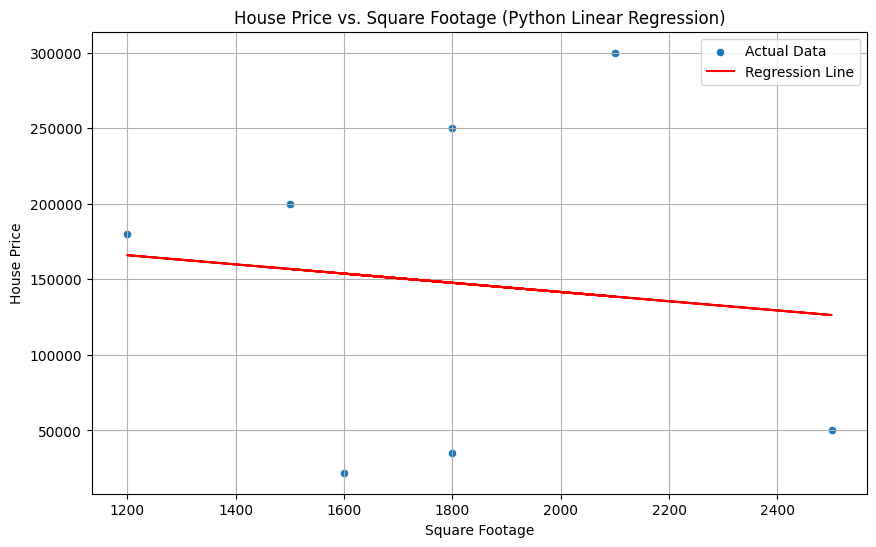

In [18]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np # Import numpy for reshaping

# Your data
data = pd.DataFrame({
    'HousePrice': [200000, 250000, 180000, 300000, 22000,50000, 35000],
    'SquareFootage': [1500, 1800, 1200, 2100, 1600, 2500, 1800]
})

# Define features (X) and target (y)
# Reshape X to be a 2D array as scikit-learn expects
X = data[['SquareFootage']].values # Use .values to get the numpy array
y = data['HousePrice'].values # Use .values to get the numpy array

# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Predict using the model
predictions = model.predict(X)

# Evaluate the model

# R-squared
r_squared = r2_score(y, predictions)
print(f"R-squared: {r_squared}")

# Mean Squared Error (MSE)
mse = mean_squared_error(y, predictions)
print(f"Mean Squared Error (MSE): {mse}")

# Print the coefficients (optional)
print(f"Intercept: {model.intercept_}")
print(f"Coefficient for SquareFootage: {model.coef_[0]}")


# You can also visualize the results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SquareFootage', y='HousePrice', data=data, label='Actual Data')
plt.plot(X, predictions, color='red', label='Regression Line')
plt.title('House Price vs. Square Footage (Python Linear Regression)')
plt.xlabel('Square Footage')
plt.ylabel('House Price')
plt.legend()
plt.grid(True)
plt.show()

The results from the second dataset indicate that a simple linear regression model using only SquareFootage as a predictor is not effective at explaining or predicting HousePrice. The model explains a negligible amount of the price variance, the average prediction errors are very large, and the relationship learned (a negative coefficient for square footage) is unexpected for this type of problem. This strongly suggests that the relationship in the second dataset is either not linear, SquareFootage is not a significant predictor by itself, or the data itself contains noise or errors that make the expected relationship unclear.